In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Loading the datasets

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
movies.shape

(10329, 3)

In [6]:
ratings.shape

(105339, 4)

In [7]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [9]:
# Making lists of all genres and movies

genres=[]
for genre in movies.genres:
    x = genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres = str(genres) 
movie_title = []
movie_title = [title[0:-7] for title in movies.title]
movie_title = str(movie_title)

In [10]:
# Merging both the dataframes 

df = pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [11]:
# Creating a dataframe of movies with the highest ratings in descending order

df1 = df.groupby(['title'])[['rating']].sum()
high_rated = df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

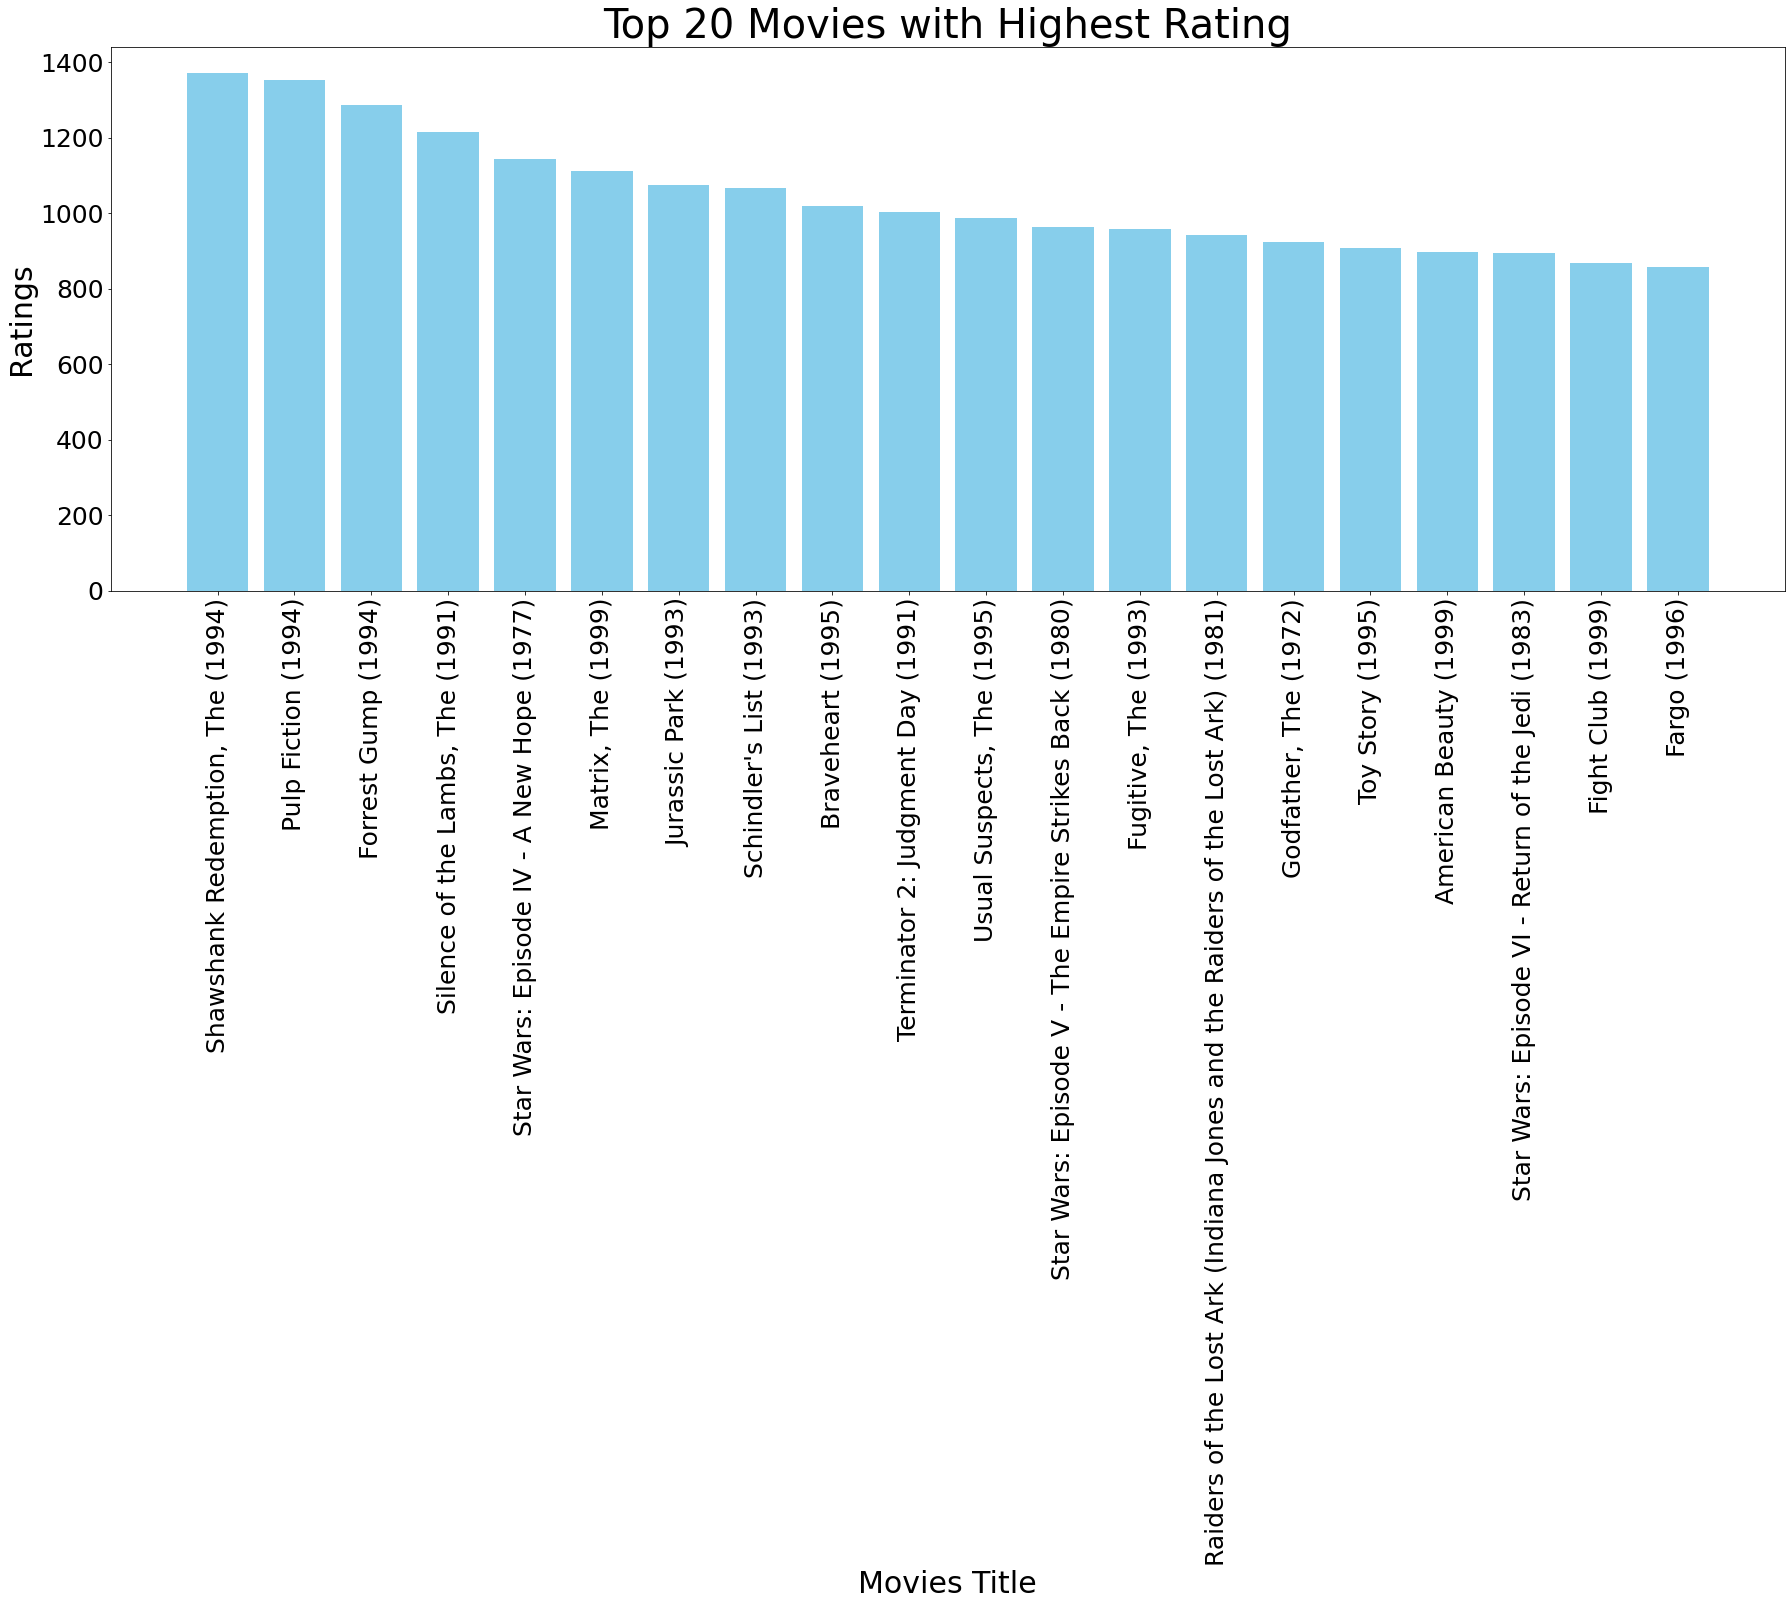

In [12]:
# Plotting the data

plt.figure(figsize=(30,10))
plt.title('Top 20 Movies with Highest Rating',fontsize=40)
plt.ylabel('Ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('Movies Title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,color='skyblue')

In [13]:
# Creating a dataframe of movies with the highest number of ratings in descending order

df2 = df.groupby('title')[['rating']].count()
rating_count_20 = df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

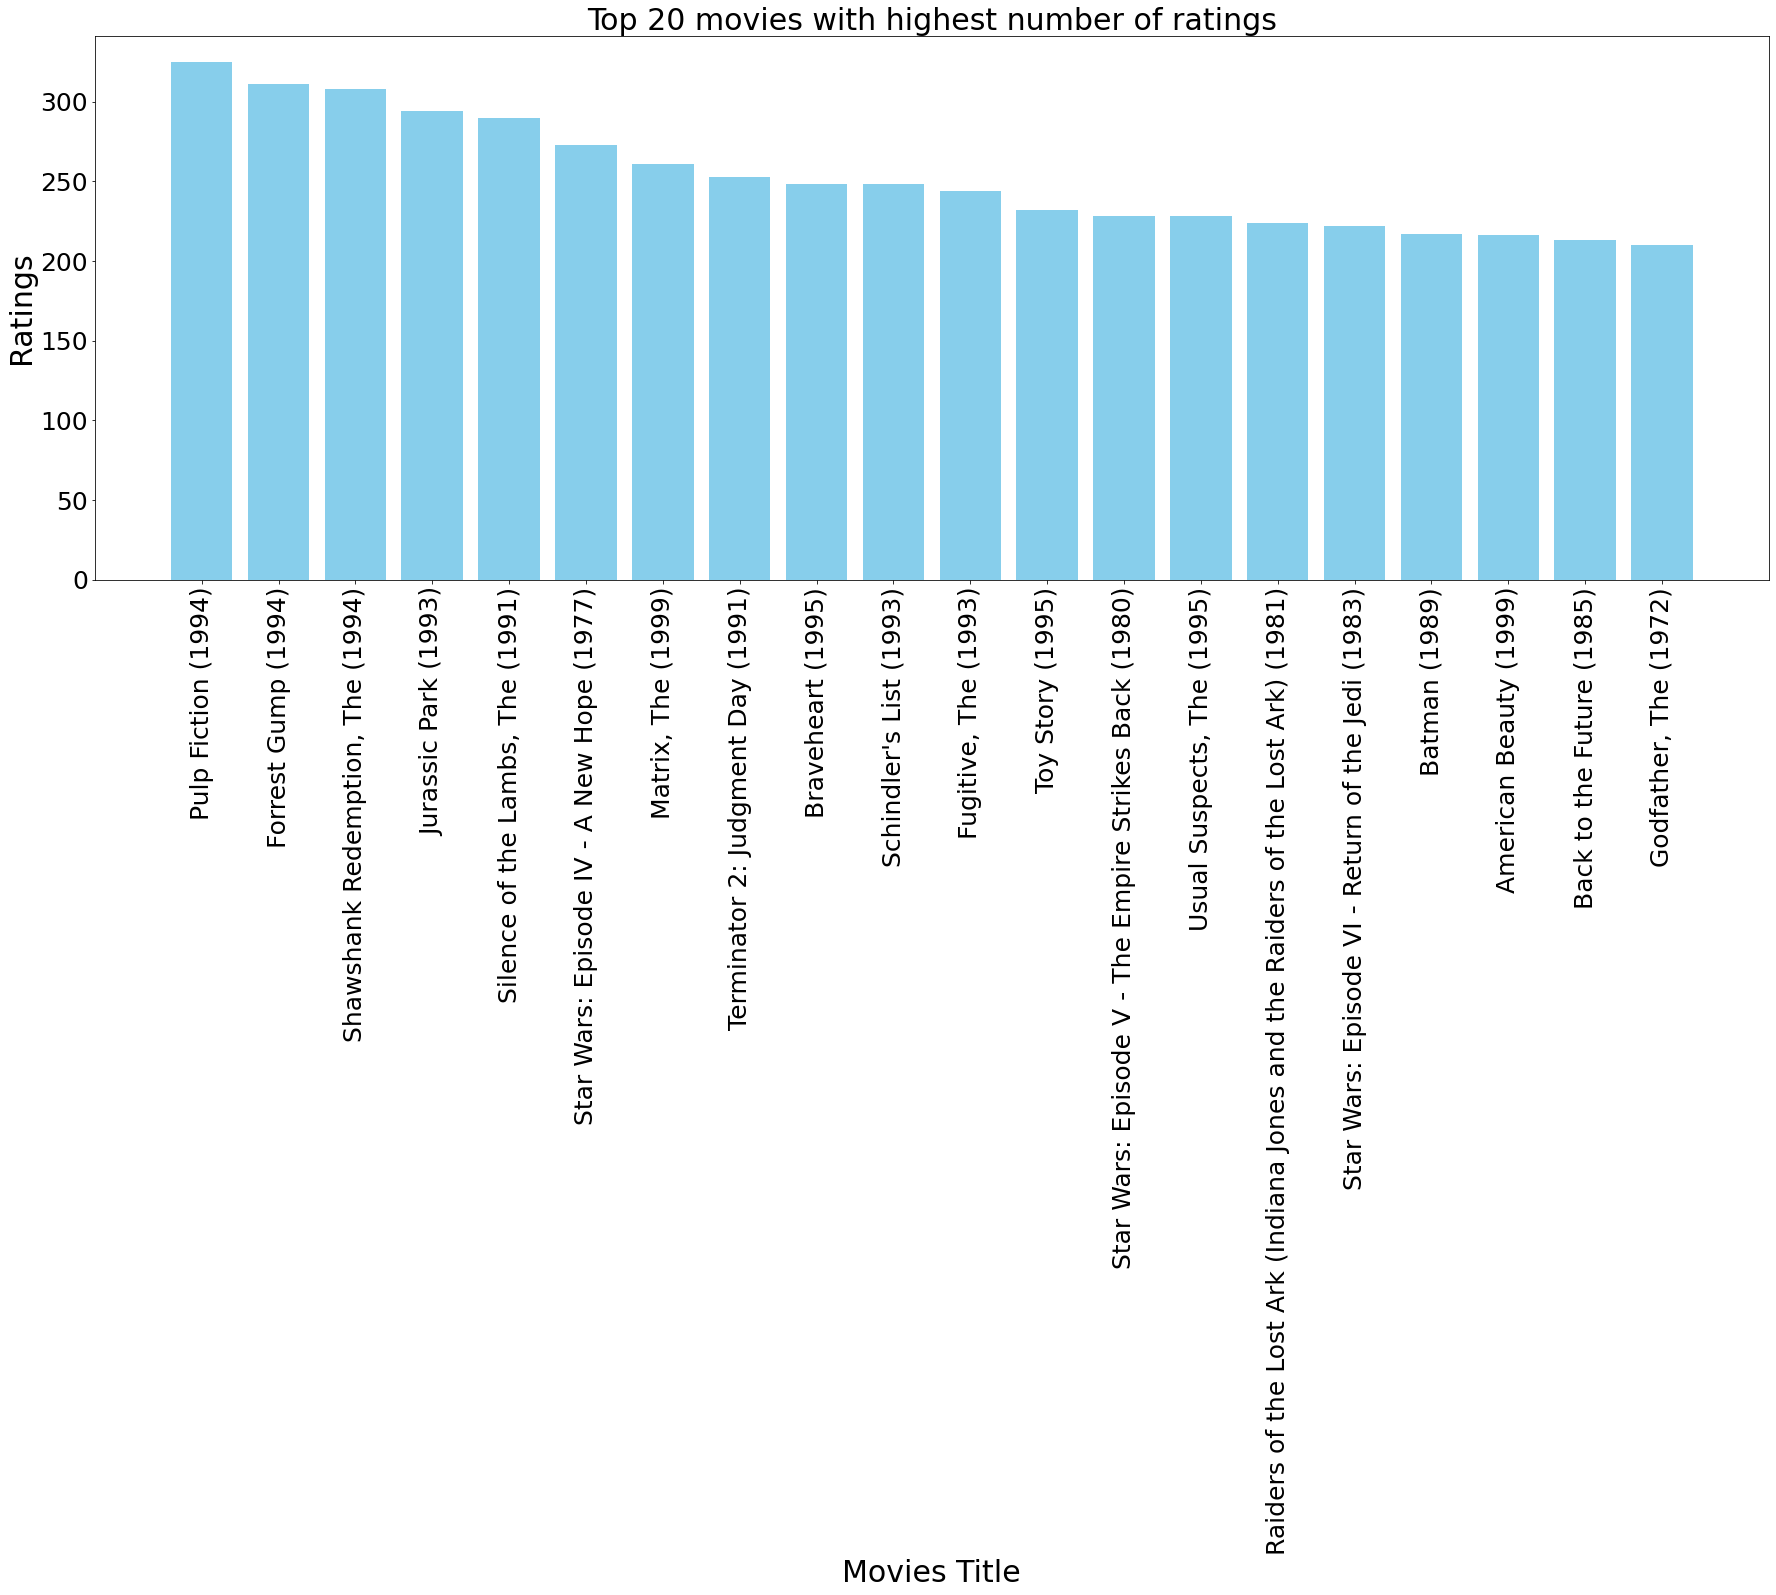

In [14]:
# Plotting the data

plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Movies Title',fontsize=30)
plt.ylabel('Ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='skyblue')

In [15]:
tv = TfidfVectorizer()
tfidf_matrix=tv.fit_transform(movies['genres'])

In [16]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#  We can recommend the user a movie by calculating the cosine similarity between the entered movie and others.

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [18]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']

def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [19]:
recommendations('Forrest Gump (1994)')

1838           Life Is Beautiful (La Vita è bella) (1997)
2399                  Train of Life (Train de vie) (1998)
4504          Divine Intervention (Yadon ilaheyya) (2002)
7554    I Served the King of England (Obsluhoval jsem ...
5243                              Kiss Them for Me (1957)
6170                            To Be or Not to Be (1983)
348                            Colonel Chabert, Le (1994)
741                             Gone with the Wind (1939)
946                           English Patient, The (1996)
1510                         From Here to Eternity (1953)
1626                                Doctor Zhivago (1965)
2185                                  Barry Lyndon (1975)
2332               Year of Living Dangerously, The (1982)
2498                           Ride with the Devil (1999)
2707               Love Is a Many-Splendored Thing (1955)
3146                                        Malèna (2000)
3297                       I Know Where I'm Going! (1945)
3399          